# Аналитика в авиакомпании

Есть два набора данных. По ним необходимо сделать следующее:
- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')


plt.rcParams['figure.figsize'] = (30, 15)

In [2]:
from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:90% !important; }</style>"))
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 <div class="alert alert-info">
    <h2>Комментарий</h2>
Импортирую необходимые мне библиотеки

In [3]:
model_aircraft = pd.read_csv('/datasets/query_1.csv')
model_aircraft.head(15)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
model_aircraft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [5]:
model_aircraft.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [6]:
 pd.DataFrame(round((model_aircraft.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
model,0
flights_amount,0


 <div class="alert alert-info">
    <h2>Комментарий </h2>
Импортировал файлы из первого датасета и изучил их. Пропусков в данных нет, тип данных соответствует. Пропусков так же нет. Таблица сама по себе небольша. Можно приступать к работе с данными

In [7]:
import pandas as pd
city_fly = pd.read_csv('/datasets/query_3.csv')
city_fly.sample(15)

,city,average_flights
64,Петрозаводск,5.870968
92,Ханты-Мансийск,8.419355
91,Хабаровск,6.548387
57,Ноябрьск,3.000000
37,Липецк,1.294118
49,Нефтеюганск,1.000000
8,Благовещенск,1.000000
96,Чита,1.580645
12,Владивосток,3.000000
94,Челябинск,6.709677


In [8]:
 pd.DataFrame(round((city_fly.isna().mean()*100),2)).style.background_gradient('coolwarm') 

,0
city,0
average_flights,0


In [9]:
city_fly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


 <div class="alert alert-info">
    <h2>Комментарий</h2>
Импортировал файлы из второго датасета и изучил их. Пропусков в данных нет, тип данных соответствует, как и в первом датасете. Пропусков так же нет. Обработки не требуется и можно приступать к работе с ним.

In [10]:
city_fly_top_10=city_fly.sort_values('average_flights', ascending=False).head(10)
city_fly_top_10

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


 <div class="alert alert-info">
    <h2>Комментарий </h2>
Создал дополнительны датасет, состоящий только из топ-10 городов. Сделал это для удобства работы.

Text(0, 0.5, 'Количество рейсов')

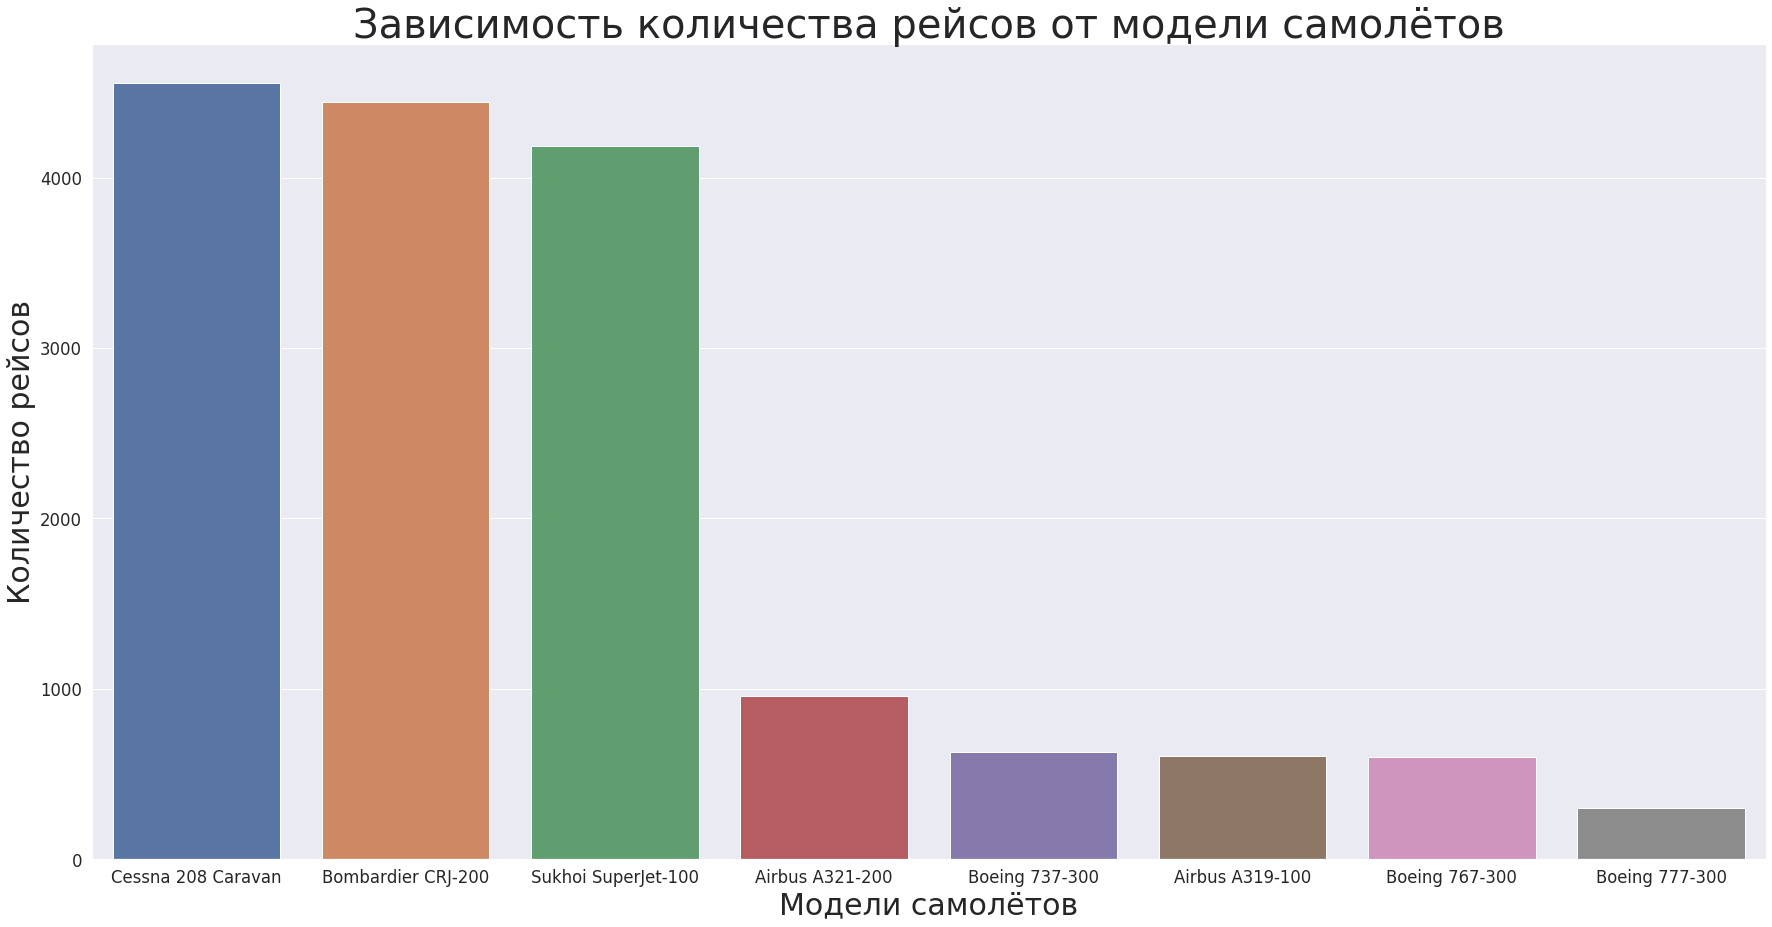

In [30]:
plot_order = model_aircraft.groupby('model')['flights_amount'].sum().sort_values(ascending=False).index.values
sns.set(font_scale=1.5)
sns.barplot(x=model_aircraft['model'],y=model_aircraft['flights_amount'], order=plot_order)

plt.title("Зависимость количества рейсов от модели самолётов", fontsize=40)
plt.xlabel("Модели самолётов", fontsize=30)
plt.ylabel("Количество рейсов", fontsize=30)

### Вывод по графику "Зависимость количества рейсов от модели самолётов"

Данный график говорит о том, что чаще всего по вылетам использовались три воздушных судна: Cessna 208 Caravan, 	Bombardier CRJ-200, Sukhoi SuperJet-100. Как можно увидеть, что это все небольшие самолёты и возможно, авиакомпании таким образом заполнили возникший спрос дополнительными рейсами.

Text(0, 0.5, 'Количество рейсов')

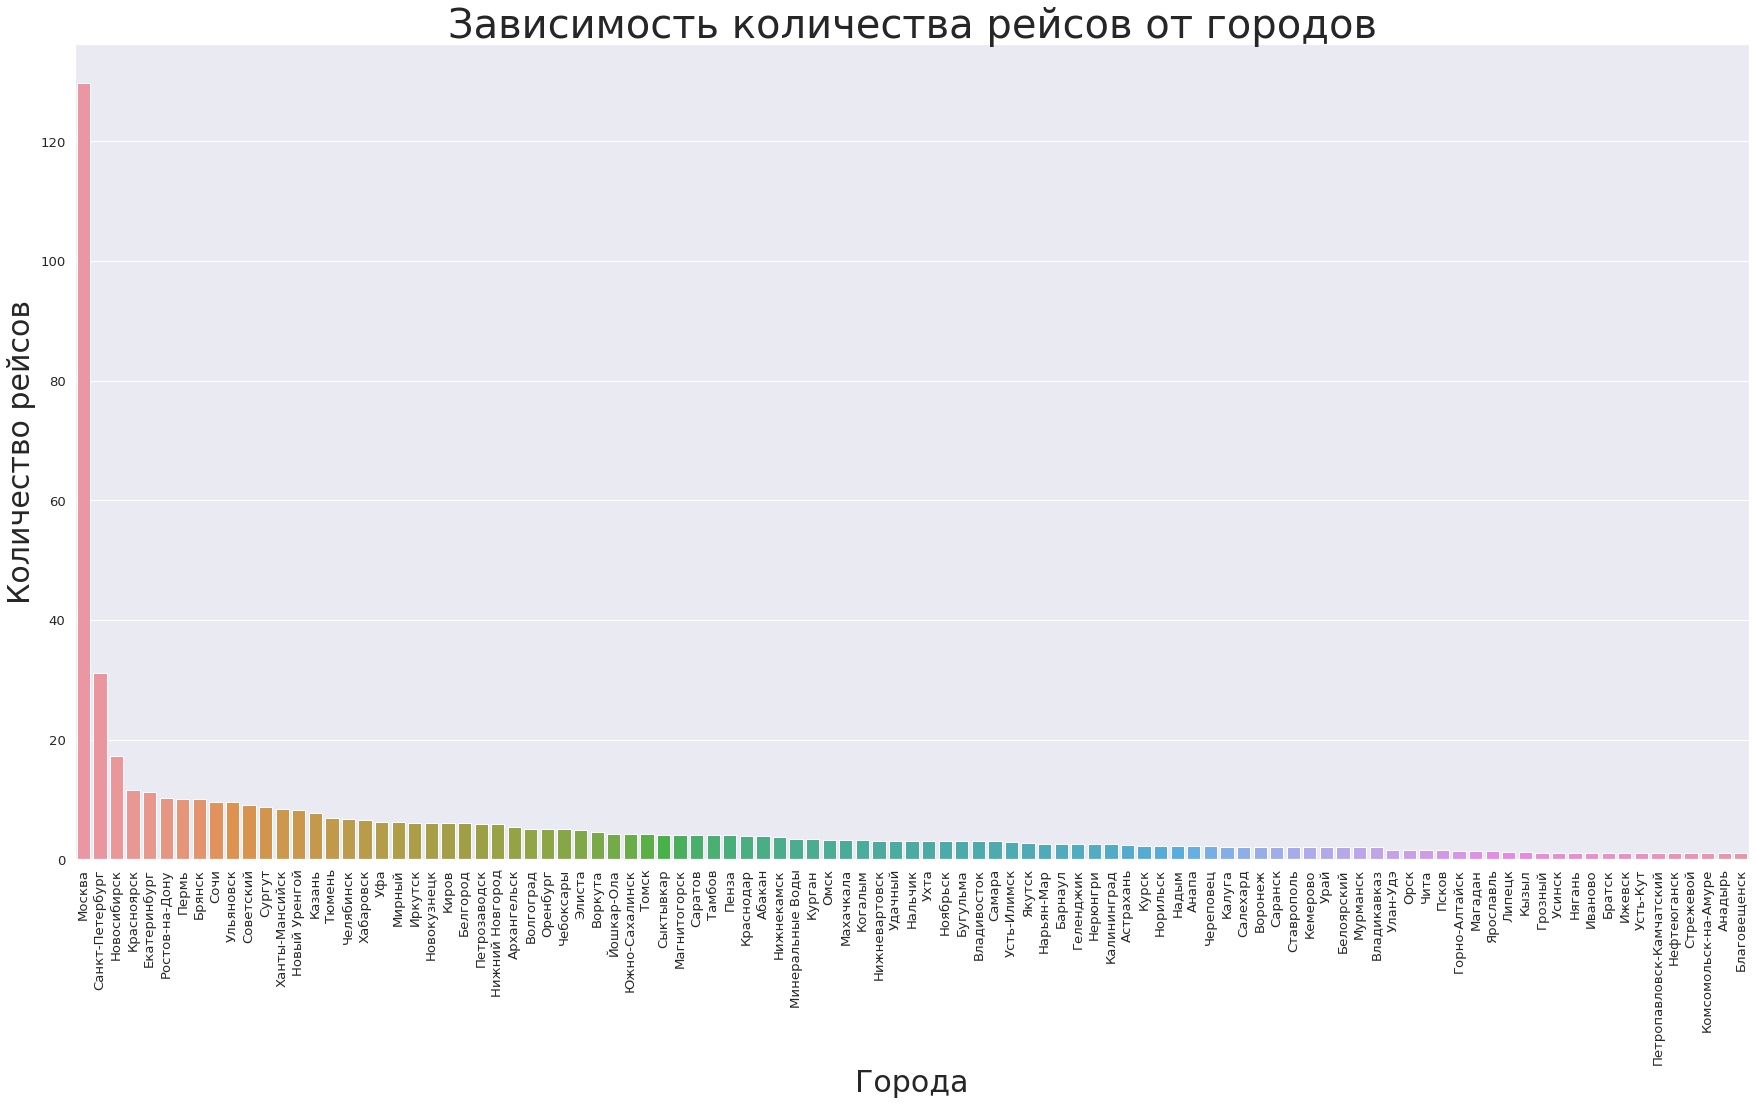

In [44]:

sns.set(font_scale=1.2)
plot_order = city_fly.groupby('city')['average_flights'].sum().sort_values(ascending=False).index.values
sns.barplot(x=city_fly['city'],y=city_fly['average_flights'], order = plot_order)
plt.xticks(rotation=90)
plt.title("Зависимость количества рейсов от городов", fontsize = 40)
plt.xlabel("Города", fontsize = 30)
plt.ylabel("Количество рейсов", fontsize = 30)


### Вывод по графику "Зависимость количества рейсов от городов"

Как мы можем заметить, география полётов представлена многими городами. Но при этом легко рассмотреть лидера среди городов по количеству рейсов. Москва - столица России и, конечно, логично было предположить, что в данном городе количество рейсов больше всего, но на данном графике мы можем это увидеть наглядно.

Text(0, 0.5, 'Количество рейсов')

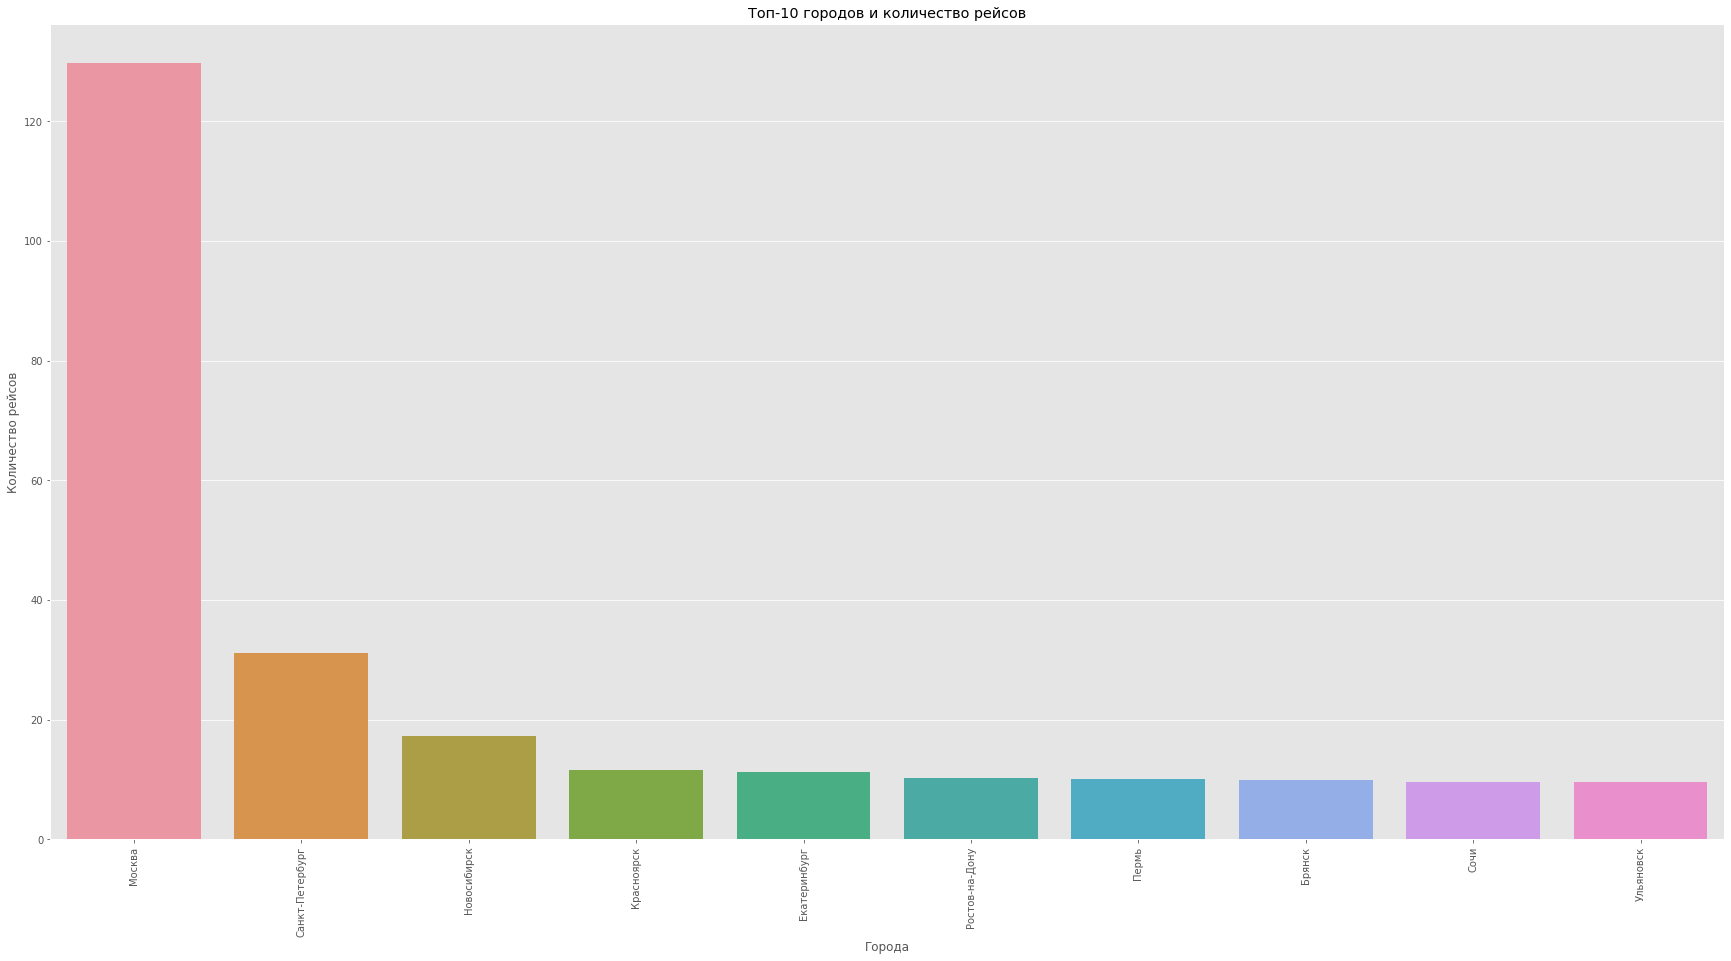

In [13]:
sns.barplot(x=city_fly_top_10['city'],y=city_fly_top_10['average_flights'])
plt.xticks(rotation=90)
plt.title("Топ-10 городов и количество рейсов")
plt.xlabel("Города")
plt.ylabel("Количество рейсов")

### Вывод по графику "Топ-10 городов и количество рейсов"

В топ-10 по количеству рейсов вошли следующие орода:
- Моска
- Санкт-Петербург
- Новосибирск
- Красноярск
- Екатеринбург
- Ростов-на-Дону
- Пермь
- Брянск
- Сочи
- Ульяновск
И первые три города по количеству рейсов это Москва, Санкт-Петербург и Нововсибирск. Мы можем сделать вывод, что город Новосибирск является наиболее популярным городом по отношению к прилётам самолётов в противоположной части России от двух крупнейших городов. Лидером является Москва.

# Общий вывод по анализу авиакомпаний

 <div class="alert alert-info">
Проанализировав данные таблицы можно сделать следующие выводы:
   1) Москва лидирует по количеству прилётов во всех городах
   2) Среднемагистральные узкофюзеляжные пассажирские самолёты делают наибольшее количество рейсов
   3) Город Новосибирск является связующим звеном в авиаперевозках для перелётов на дальние расстояния
   

### P.S. Можно было бы сделать более точные выводы, зная стыковочные рейсы, к примеру или покупку авиабилетов пассажирами, то есть города прилётов и вылетов. Тогда мы могли бы сказать про перспективы направлений и маршрутов. Я бы эти данные запросил